<a href="https://colab.research.google.com/github/arshiya7412/Disease-Prediction-AI/blob/main/app_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UPLOAD AND LOAD THE DATASET

In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Training.csv']))
df.head()

Saving Training.csv to Training.csv


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


DATA EXPLORATION

In [ ]:
df.info()
df.describe()
df['prognosis'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


,count
prognosis,
Fungal infection,120
Allergy,120
GERD,120
Chronic cholestasis,120
Drug Reaction,120
Peptic ulcer diseae,120
AIDS,120
Diabetes,120
Gastroenteritis,120


CHECK FOR MISSING VALUES AND DUPLICATES

In [ ]:
print("Missing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Missing values:
 itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

Duplicates: 4616


VISUALIZE FEW FEATURES

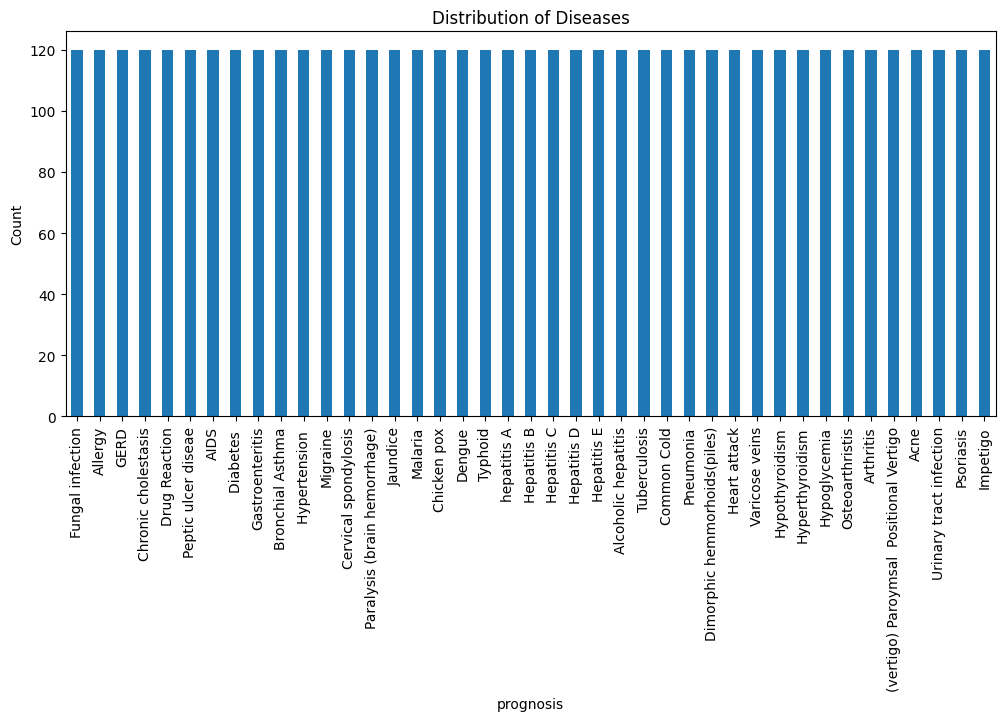

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['prognosis'].value_counts().plot(kind='bar', figsize=(12, 5))
plt.title("Distribution of Diseases")
plt.ylabel("Count")
plt.show()

IDENTIFY FEATURES AND TARGET

In [ ]:
X = df.drop('prognosis', axis=1)
y = df['prognosis']

FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

MODEL BUILDING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load data
df = pd.read_csv("Training.csv")
X = df.drop("prognosis", axis=1)
y = df["prognosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
             

EVALUTION

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
             

In [ ]:
disease_info = {
    "Fungal infection": {
        "description": "Infections caused by various fungi affecting skin, nails, hair, or internal organs. Common types include athlete's foot, ringworm, candidiasis, and more severe systemic infections.",
        "recommended_action": "Use appropriate antifungal medications (topical or oral), maintain good hygiene, keep affected areas dry, complete full course of treatment. Seek medical care for severe or persistent infections.",
        "risk_level": "Low to Moderate (Severe in immunocompromised patients)"
    },

    "Allergy": {
        "description": "Hypersensitive immune response to substances (allergens) that are typically harmless. Symptoms range from mild (sneezing, itching) to severe (anaphylaxis).",
        "recommended_action": "Identify and avoid triggers, use antihistamines or prescribed medications for symptom control, consider immunotherapy for severe cases. Carry emergency medication (e.g., epinephrine auto-injector) if prescribed for severe allergies.",
        "risk_level": "Low to High (Depending on severity and type)"
    },

    "GERD": {
        "description": "Chronic condition where stomach acid flows back into the esophagus, causing heartburn, regurgitation, and possible damage to the esophageal lining.",
        "recommended_action": "Lifestyle modifications (avoid trigger foods, eat smaller meals, don't lie down after eating), weight management, medication (antacids, H2 blockers, or proton pump inhibitors), and in severe cases, surgical intervention may be necessary.",
        "risk_level": "Low to Moderate (Can lead to complications if untreated)"
    },

    "Chronic cholestasis": {
        "description": "Condition where bile flow from the liver is reduced or blocked, leading to jaundice, itching, and potential liver damage over time.",
        "recommended_action": "Identify and treat underlying cause, medication to relieve itching and improve bile flow, dietary adjustments (low-fat diet, fat-soluble vitamin supplements), and regular monitoring of liver function. Severe cases may require specialized hepatology care.",
        "risk_level": "Moderate to High (Can lead to liver damage)"
    },

    "Drug Reaction": {
        "description": "Adverse response to medications ranging from mild skin reactions to severe systemic responses (e.g., Stevens-Johnson syndrome or anaphylaxis).",
        "recommended_action": "Discontinue suspected medication (under medical supervision), seek immediate medical attention for severe reactions, document allergies for future reference. Symptomatic treatment may include antihistamines, steroids, or supportive care.",
        "risk_level": "Low to Very High (Can be life-threatening in severe cases)"
    },

    "Peptic ulcer disease": {
        "description": "Open sores that develop in the lining of the stomach, upper small intestine, or esophagus, often caused by H. pylori bacteria or NSAID use.",
        "recommended_action": "Antibiotic therapy for H. pylori infections, acid-reducing medications (PPIs, H2 blockers), avoid NSAIDs, alcohol, and smoking, dietary modifications. Seek immediate care for symptoms of bleeding or perforation.",
        "risk_level": "Moderate (High if complications develop)"
    },

    "AIDS": {
        "description": "Advanced stage of HIV infection characterized by severely compromised immune function and vulnerability to opportunistic infections and certain cancers.",
        "recommended_action": "Antiretroviral therapy (ART) to suppress viral replication, prophylactic medications to prevent opportunistic infections, regular monitoring of CD4 count and viral load, comprehensive care addressing physical and psychological aspects, prevention counseling.",
        "risk_level": "High (Chronic, life-threatening without treatment)"
    },

    "Diabetes": {
        "description": "Group of metabolic disorders characterized by high blood sugar levels due to inadequate insulin production, insulin resistance, or both.",
        "recommended_action": "Blood glucose monitoring, medication (insulin, oral antidiabetics) as prescribed, dietary management, regular physical activity, weight management, regular check-ups for complications (eyes, kidneys, feet, cardiovascular). Diabetes education is essential.",
        "risk_level": "Moderate to High (Chronic with potential for serious complications)"
    },

    "Gastroenteritis": {
        "description": "Inflammation of the stomach and intestines typically caused by viral or bacterial infections, resulting in diarrhea, vomiting, abdominal pain, and possible dehydration.",
        "recommended_action": "Oral rehydration therapy, rest, gradual reintroduction of food (BRAT diet), antibiotics only if bacterial cause confirmed. Seek medical attention for severe dehydration, bloody stool, persistent high fever, or symptoms lasting more than a few days.",
        "risk_level": "Low to Moderate (Higher risk in vulnerable populations)"
    },

    "Bronchial Asthma": {
        "description": "Chronic inflammatory airway disorder characterized by variable airflow obstruction, wheezing, coughing, and shortness of breath.",
        "recommended_action": "Identify and avoid triggers, use controller medications daily as prescribed, have rescue inhalers readily available, follow an asthma action plan, regular medical follow-up. Seek emergency care for severe attacks not responding to rescue medication.",
        "risk_level": "Moderate (High during acute exacerbations)"
    },

    "Hypertension": {
        "description": "Chronic condition where blood pressure against artery walls is consistently too high, often asymptomatic but can lead to serious cardiovascular complications.",
        "recommended_action": "Regular blood pressure monitoring, medication as prescribed, lifestyle modifications (reduced sodium intake, DASH diet, physical activity, weight management, limit alcohol, stop smoking), stress management, and regular medical follow-up.",
        "risk_level": "Moderate to High (Due to long-term complications)"
    },

    "Migraine": {
        "description": "Neurological condition characterized by recurrent moderate to severe headaches, often with nausea, sensitivity to light and sound, and sometimes preceded by sensory disturbances (aura).",
        "recommended_action": "Identify and avoid triggers, acute medications to treat attacks, preventive medications for frequent migraines, stress management, sleep hygiene, hydration, and complementary therapies as appropriate. Keep a migraine diary to track patterns.",
        "risk_level": "Low to Moderate (Impacts quality of life)"
    },

    "Cervical spondylosis": {
        "description": "Age-related degeneration of cervical spine discs and joints, potentially causing neck pain, stiffness, and sometimes nerve compression symptoms.",
        "recommended_action": "Pain management (medications, physical therapy), gentle exercises to improve strength and flexibility, proper ergonomics, possibly cervical collar for acute flares. Surgical intervention for severe cases with neurological deficit.",
        "risk_level": "Low to Moderate (Higher if neurological symptoms present)"
    },

    "Paralysis (brain hemorrhage)": {
        "description": "Loss of muscle function due to bleeding in the brain, which may be caused by trauma, ruptured aneurysm, or other vascular abnormalities.",
        "recommended_action": "Immediate emergency medical care, neurosurgical intervention if appropriate, followed by comprehensive rehabilitation (physical, occupational, speech therapy), adaptive equipment, psychological support, and secondary stroke prevention measures.",
        "risk_level": "Very High (Life-threatening, potential for permanent disability)"
    },

    "Jaundice": {
        "description": "Yellowing of skin, eyes, and mucous membranes due to elevated bilirubin levels, indicating liver, bile duct, or blood cell disorders.",
        "recommended_action": "Identify and treat underlying cause, supportive care, monitoring liver function tests, potentially phototherapy for neonatal jaundice. May require hospitalization depending on severity and cause.",
        "risk_level": "Moderate to High (Depends on underlying cause)"
    },

    "Malaria": {
        "description": "Parasitic infection transmitted by mosquitoes, causing cycles of fever, chills, sweating, and potentially severe complications affecting multiple organs.",
        "recommended_action": "Appropriate antimalarial medication based on parasite species and local resistance patterns, supportive care, fever management, hydration. Preventive measures for future (bed nets, repellents, prophylactic medications in endemic areas).",
        "risk_level": "Moderate to High (Can be fatal if untreated, especially P. falciparum)"
    },

    "Chicken pox": {
        "description": "Highly contagious viral infection causing itchy blistering rash, fever, and general malaise, primarily affecting children but can be more severe in adults.",
        "recommended_action": "Symptomatic treatment (antipyretics, antihistamines, calamine lotion), isolation until lesions crust over, antiviral medications for high-risk individuals if started early. Vaccination is available for prevention.",
        "risk_level": "Low to Moderate (Higher in adults and immunocompromised)"
    },

    "Dengue": {
        "description": "Mosquito-borne viral infection causing high fever, severe headache, pain behind eyes, joint/muscle pain, and in severe cases, hemorrhagic complications.",
        "recommended_action": "Supportive care with emphasis on hydration, fever management, pain relief, close monitoring for warning signs of severe dengue. Hospitalization for severe cases. No specific antiviral treatment exists.",
        "risk_level": "Moderate to High (Severe dengue can be life-threatening)"
    },

    "Typhoid": {
        "description": "Bacterial infection caused by Salmonella typhi, transmitted through contaminated food or water, causing sustained fever, headache, abdominal pain, and sometimes intestinal perforation.",
        "recommended_action": "Appropriate antibiotics as per sensitivity testing, adequate hydration, fever management, monitoring for complications. Preventive measures include improved sanitation, safe food/water practices, and vaccination.",
        "risk_level": "Moderate to High (Can be fatal if untreated)"
    },

    "Hepatitis A": {
        "description": "Viral infection affecting the liver, transmitted through fecal-oral route via contaminated food/water, causing jaundice, fatigue, abdominal pain, and nausea.",
        "recommended_action": "Supportive care (rest, hydration, nutritional support), avoid alcohol and hepatotoxic medications, practice good hygiene to prevent transmission. Vaccination is available for prevention.",
        "risk_level": "Low to Moderate (Rarely fatal, self-limiting)"
    },

    "Hepatitis B": {
        "description": "Viral infection affecting the liver, transmitted through blood, sexual contact, or mother-to-child, potentially leading to chronic infection and complications.",
        "recommended_action": "Antiviral medications for chronic infection, monitoring liver function, avoiding alcohol, vaccination for prevention, screening of contacts, prevention counseling. Regular monitoring for complications including liver cancer.",
        "risk_level": "Moderate to High (Can lead to cirrhosis and liver cancer)"
    },

    "Hepatitis C": {
        "description": "Viral infection affecting the liver, primarily transmitted through blood exposure, often asymptomatic initially but can lead to chronic infection and liver damage.",
        "recommended_action": "Direct-acting antiviral medications with high cure rates, liver function monitoring, avoidance of alcohol, management of complications if present. Regular screening for liver cancer in those with advanced disease.",
        "risk_level": "Moderate to High (Can lead to cirrhosis and liver cancer)"
    },

    "Hepatitis D": {
        "description": "Viral infection that requires co-infection with Hepatitis B to replicate, causing more severe liver disease than HBV alone.",
        "recommended_action": "Management of underlying Hepatitis B infection, potentially pegylated interferon, supportive care, liver function monitoring. Prevention through Hepatitis B vaccination since HDV cannot establish infection without HBV.",
        "risk_level": "High (Causes more severe disease than HBV alone)"
    },

    "Hepatitis E": {
        "description": "Viral infection primarily transmitted through contaminated water, usually self-limiting but can cause severe disease in pregnant women and immunocompromised individuals.",
        "recommended_action": "Supportive care, rest, adequate nutrition and hydration, avoidance of alcohol and hepatotoxic medications. Prevention through improved sanitation and safe water practices.",
        "risk_level": "Low to High (High risk in pregnant women)"
    },

    "Alcoholic hepatitis": {
        "description": "Inflammation of the liver due to excessive alcohol consumption, ranging from mild to life-threatening, often a precursor to cirrhosis.",
        "recommended_action": "Complete alcohol abstinence, nutritional support, corticosteroids or pentoxifylline in severe cases, management of complications, addiction counseling, liver transplant evaluation for appropriate candidates with end-stage disease.",
        "risk_level": "High (Can be life-threatening in severe cases)"
    },

    "Tuberculosis": {
        "description": "Bacterial infection primarily affecting the lungs but can affect other organs, transmitted through air, causing chronic cough, weight loss, night sweats, and fatigue.",
        "recommended_action": "Multi-drug antibiotic regimen for 6+ months, directly observed therapy in some cases, contact tracing and screening, isolation during initial infectious period, supportive care and nutritional support.",
        "risk_level": "Moderate to High (Can be fatal if untreated)"
    },

    "Common Cold": {
        "description": "Viral upper respiratory infection causing nasal congestion, sore throat, cough, and mild fever, generally self-limiting.",
        "recommended_action": "Symptomatic treatment (decongestants, analgesics), rest, adequate hydration, humidified air. Antibiotics are not effective against viral infections. Prevent spread through hand hygiene and respiratory etiquette.",
        "risk_level": "Low (Self-limiting in most cases)"
    },

    "Pneumonia": {
        "description": "Infection causing inflammation of the air sacs in one or both lungs, which may fill with fluid, caused by bacteria, viruses, or fungi.",
        "recommended_action": "Appropriate antimicrobial therapy based on likely pathogen, supportive care, oxygen therapy if needed, hydration, and possibly hospitalization for severe cases. Vaccination against pneumococcal pneumonia and influenza is recommended for prevention in high-risk groups.",
        "risk_level": "Moderate to High (Can be life-threatening, especially in vulnerable populations)"
    },

    "Dimorphic hemorrhoids(piles)": {
        "description": "Swollen blood vessels in and around the rectum and anus, which can cause pain, itching, bleeding, and discomfort, especially during bowel movements.",
        "recommended_action": "Conservative measures (high-fiber diet, adequate hydration, sitz baths, topical treatments), minimally invasive procedures for persistent cases (rubber band ligation, sclerotherapy), or surgical intervention for severe cases. Lifestyle modifications to prevent constipation.",
        "risk_level": "Low (Rarely causes serious complications)"
    },

    "Heart attack": {
        "description": "Sudden blockage of blood flow to part of the heart muscle, causing damage or death of heart tissue, often presenting with chest pain, shortness of breath, and radiating discomfort.",
        "recommended_action": "Immediate emergency medical attention, reperfusion therapy (thrombolytics, angioplasty), medications to prevent further damage and complications, cardiac rehabilitation, lifestyle modifications, and secondary prevention (medications, risk factor control).",
        "risk_level": "Very High (Life-threatening medical emergency)"
    },

    "Varicose veins": {
        "description": "Enlarged, twisted veins, commonly appearing in legs due to faulty valves, causing cosmetic concerns, discomfort, swelling, and potentially complications like skin changes or ulcers.",
        "recommended_action": "Conservative measures (compression stockings, leg elevation, exercise, weight management), minimally invasive procedures (sclerotherapy, endovenous laser treatment) for symptomatic cases, or surgical intervention for severe cases with complications.",
        "risk_level": "Low to Moderate (Rarely life-threatening but can impact quality of life)"
    },

    "Hypothyroidism": {
        "description": "Condition where the thyroid gland doesn't produce enough thyroid hormones, leading to fatigue, cold intolerance, weight gain, dry skin, constipation, and other metabolic disturbances.",
        "recommended_action": "Thyroid hormone replacement therapy (typically levothyroxine), regular monitoring of thyroid function tests to adjust dosage, addressing underlying causes if applicable, lifetime management with periodic follow-up.",
        "risk_level": "Low to Moderate (Serious if untreated, manageable with treatment)"
    },

    "Hyperthyroidism": {
        "description": "Condition where the thyroid gland produces excessive thyroid hormones, causing increased metabolism, weight loss despite increased appetite, heat intolerance, anxiety, and palpitations.",
        "recommended_action": "Anti-thyroid medications, radioactive iodine therapy, or surgery depending on cause and severity, beta-blockers for symptom control, regular monitoring of thyroid function, and treatment of underlying causes like Graves' disease if present.",
        "risk_level": "Moderate (Can lead to thyroid storm if untreated, which is life-threatening)"
    },

    "Hypoglycemia": {
        "description": "Abnormally low blood sugar levels, causing sweating, trembling, hunger, confusion, and potentially loss of consciousness, often associated with diabetes treatment but can have other causes.",
        "recommended_action": "Immediate consumption of fast-acting carbohydrates for conscious patients, glucagon administration for severe cases, identification and treatment of underlying cause, adjustment of diabetes medications if applicable, education on recognition and prevention.",
        "risk_level": "Moderate to High (Can lead to coma or death if severe and untreated)"
    },

    "Osteoarthritis": {
        "description": "Degenerative joint disease characterized by breakdown of cartilage, leading to pain, stiffness, reduced range of motion, and functional limitations, particularly affecting weight-bearing joints.",
        "recommended_action": "Pain management (medications, physical therapy), weight management, appropriate exercise, assistive devices, joint injections, and joint replacement surgery for advanced cases. Focus on maintaining function and quality of life.",
        "risk_level": "Low (Not life-threatening but impacts quality of life and functionality)"
    },

    "Arthritis": {
        "description": "Autoimmune inflammatory condition causing joint pain, swelling, stiffness, and eventual deformity, potentially affecting multiple organ systems beyond joints.",
        "recommended_action": "Early initiation of disease-modifying antirheumatic drugs (DMARDs), biologic agents for moderate to severe disease, anti-inflammatory medications, physical and occupational therapy, joint protection strategies, and regular monitoring for disease activity and medication side effects.",
        "risk_level": "Moderate (Chronic condition with potential for systemic complications)"
    },

    "(vertigo) Paroymsal Positional Vertigo": {
        "description": "Inner ear disorder causing brief episodes of dizziness triggered by specific changes in head position, resulting from displaced calcium crystals in the inner ear.",
        "recommended_action": "Canalith repositioning procedures (Epley maneuver), vestibular rehabilitation exercises, symptomatic medications for acute episodes, safety precautions to prevent falls, and follow-up to ensure resolution or identify alternative causes.",
        "risk_level": "Low (Not dangerous itself but can lead to falls and injuries)"
    },

    "Acne": {
        "description": "Inflammatory skin condition involving oil glands and hair follicles, causing pimples, blackheads, whiteheads, and sometimes cysts or nodules, commonly affecting adolescents but can persist into adulthood.",
        "recommended_action": "Consistent skin care routine, topical treatments (benzoyl peroxide, retinoids, antibiotics), oral medications for moderate to severe cases (antibiotics, isotretinoin, hormonal therapy for females), avoidance of triggers, and dermatological follow-up for refractory cases.",
        "risk_level": "Low (Primarily affects appearance and psychological well-being)"
    },

    "Urinary tract infection": {
        "description": "Bacterial infection affecting any part of the urinary system (kidneys, ureters, bladder, urethra), causing painful urination, frequency, urgency, and sometimes fever or flank pain.",
        "recommended_action": "Appropriate antibiotics based on culture when possible, adequate hydration, pain management, preventive measures (proper hygiene, urinating after intercourse, cranberry products), and follow-up for recurrent infections to identify underlying causes.",
        "risk_level": "Low to Moderate (Higher if infection reaches kidneys)"
    },

    "Psoriasis": {
        "description": "Chronic autoimmune condition causing rapid skin cell turnover, resulting in thick, red, scaly patches on the skin surface, sometimes associated with joint inflammation (psoriatic arthritis).",
        "recommended_action": "Topical treatments (corticosteroids, vitamin D analogs, retinoids), phototherapy, systemic medications for moderate to severe cases (methotrexate, biologics), lifestyle modifications (stress management, avoiding triggers), and regular dermatological follow-up.",
        "risk_level": "Low to Moderate (Chronic condition with psychological impact, risk increases if psoriatic arthritis develops)"
    },

    "Impetigo": {
        "description": "Highly contagious bacterial skin infection, typically causing red sores that rupture, ooze, and form a honey-colored crust, commonly affecting children.",
        "recommended_action": "Topical or oral antibiotics depending on severity, gentle cleansing of affected areas, prevention of spread through good hygiene practices, avoiding sharing personal items, and keeping nails short to prevent scratching and spread.",
        "risk_level": "Low (Rarely causes serious complications but highly contagious)"
    }
}

MAKE PREDICTIONS FROM INPUT

In [ ]:
import numpy as np

# Sample input (0 or 1 for each symptom, matching training features)
new_patient = np.zeros((1, X.shape[1]))  # All symptoms 0
new_patient[0][X.columns.get_loc('fatigue')] = 1  # Example symptom
new_patient[0][X.columns.get_loc('nausea')] = 1

prediction = model.predict(new_patient)[0]
prob = model.predict_proba(new_patient).max()

print("Predicted Disease:", prediction)
print("Confidence Score:", round(prob * 100, 2), "%")

Predicted Disease: Hepatitis C
Confidence Score: 36.0 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ADD RISK LEVEL DESCRIPTION ACTION

In [ ]:
# You can expand this dictionary
disease_info = {
    "Fungal infection": {
        "description": "Infections caused by various fungi affecting skin, nails, hair, or internal organs. Common types include athlete's foot, ringworm, candidiasis, and more severe systemic infections.",
        "recommended_action": "Use appropriate antifungal medications (topical or oral), maintain good hygiene, keep affected areas dry, complete full course of treatment. Seek medical care for severe or persistent infections.",
        "risk_level": "Low to Moderate (Severe in immunocompromised patients)"
    },

    "Allergy": {
        "description": "Hypersensitive immune response to substances (allergens) that are typically harmless. Symptoms range from mild (sneezing, itching) to severe (anaphylaxis).",
        "recommended_action": "Identify and avoid triggers, use antihistamines or prescribed medications for symptom control, consider immunotherapy for severe cases. Carry emergency medication (e.g., epinephrine auto-injector) if prescribed for severe allergies.",
        "risk_level": "Low to High (Depending on severity and type)"
    },

    "GERD": {
        "description": "Chronic condition where stomach acid flows back into the esophagus, causing heartburn, regurgitation, and possible damage to the esophageal lining.",
        "recommended_action": "Lifestyle modifications (avoid trigger foods, eat smaller meals, don't lie down after eating), weight management, medication (antacids, H2 blockers, or proton pump inhibitors), and in severe cases, surgical intervention may be necessary.",
        "risk_level": "Low to Moderate (Can lead to complications if untreated)"
    },

    "Chronic cholestasis": {
        "description": "Condition where bile flow from the liver is reduced or blocked, leading to jaundice, itching, and potential liver damage over time.",
        "recommended_action": "Identify and treat underlying cause, medication to relieve itching and improve bile flow, dietary adjustments (low-fat diet, fat-soluble vitamin supplements), and regular monitoring of liver function. Severe cases may require specialized hepatology care.",
        "risk_level": "Moderate to High (Can lead to liver damage)"
    },

    "Drug Reaction": {
        "description": "Adverse response to medications ranging from mild skin reactions to severe systemic responses (e.g., Stevens-Johnson syndrome or anaphylaxis).",
        "recommended_action": "Discontinue suspected medication (under medical supervision), seek immediate medical attention for severe reactions, document allergies for future reference. Symptomatic treatment may include antihistamines, steroids, or supportive care.",
        "risk_level": "Low to Very High (Can be life-threatening in severe cases)"
    },

    "Peptic ulcer disease": {
        "description": "Open sores that develop in the lining of the stomach, upper small intestine, or esophagus, often caused by H. pylori bacteria or NSAID use.",
        "recommended_action": "Antibiotic therapy for H. pylori infections, acid-reducing medications (PPIs, H2 blockers), avoid NSAIDs, alcohol, and smoking, dietary modifications. Seek immediate care for symptoms of bleeding or perforation.",
        "risk_level": "Moderate (High if complications develop)"
    },

    "AIDS": {
        "description": "Advanced stage of HIV infection characterized by severely compromised immune function and vulnerability to opportunistic infections and certain cancers.",
        "recommended_action": "Antiretroviral therapy (ART) to suppress viral replication, prophylactic medications to prevent opportunistic infections, regular monitoring of CD4 count and viral load, comprehensive care addressing physical and psychological aspects, prevention counseling.",
        "risk_level": "High (Chronic, life-threatening without treatment)"
    },

    "Diabetes": {
        "description": "Group of metabolic disorders characterized by high blood sugar levels due to inadequate insulin production, insulin resistance, or both.",
        "recommended_action": "Blood glucose monitoring, medication (insulin, oral antidiabetics) as prescribed, dietary management, regular physical activity, weight management, regular check-ups for complications (eyes, kidneys, feet, cardiovascular). Diabetes education is essential.",
        "risk_level": "Moderate to High (Chronic with potential for serious complications)"
    },

    "Gastroenteritis": {
        "description": "Inflammation of the stomach and intestines typically caused by viral or bacterial infections, resulting in diarrhea, vomiting, abdominal pain, and possible dehydration.",
        "recommended_action": "Oral rehydration therapy, rest, gradual reintroduction of food (BRAT diet), antibiotics only if bacterial cause confirmed. Seek medical attention for severe dehydration, bloody stool, persistent high fever, or symptoms lasting more than a few days.",
        "risk_level": "Low to Moderate (Higher risk in vulnerable populations)"
    },

    "Bronchial Asthma": {
        "description": "Chronic inflammatory airway disorder characterized by variable airflow obstruction, wheezing, coughing, and shortness of breath.",
        "recommended_action": "Identify and avoid triggers, use controller medications daily as prescribed, have rescue inhalers readily available, follow an asthma action plan, regular medical follow-up. Seek emergency care for severe attacks not responding to rescue medication.",
        "risk_level": "Moderate (High during acute exacerbations)"
    },

    "Hypertension": {
        "description": "Chronic condition where blood pressure against artery walls is consistently too high, often asymptomatic but can lead to serious cardiovascular complications.",
        "recommended_action": "Regular blood pressure monitoring, medication as prescribed, lifestyle modifications (reduced sodium intake, DASH diet, physical activity, weight management, limit alcohol, stop smoking), stress management, and regular medical follow-up.",
        "risk_level": "Moderate to High (Due to long-term complications)"
    },

    "Migraine": {
        "description": "Neurological condition characterized by recurrent moderate to severe headaches, often with nausea, sensitivity to light and sound, and sometimes preceded by sensory disturbances (aura).",
        "recommended_action": "Identify and avoid triggers, acute medications to treat attacks, preventive medications for frequent migraines, stress management, sleep hygiene, hydration, and complementary therapies as appropriate. Keep a migraine diary to track patterns.",
        "risk_level": "Low to Moderate (Impacts quality of life)"
    },

    "Cervical spondylosis": {
        "description": "Age-related degeneration of cervical spine discs and joints, potentially causing neck pain, stiffness, and sometimes nerve compression symptoms.",
        "recommended_action": "Pain management (medications, physical therapy), gentle exercises to improve strength and flexibility, proper ergonomics, possibly cervical collar for acute flares. Surgical intervention for severe cases with neurological deficit.",
        "risk_level": "Low to Moderate (Higher if neurological symptoms present)"
    },

    "Paralysis (brain hemorrhage)": {
        "description": "Loss of muscle function due to bleeding in the brain, which may be caused by trauma, ruptured aneurysm, or other vascular abnormalities.",
        "recommended_action": "Immediate emergency medical care, neurosurgical intervention if appropriate, followed by comprehensive rehabilitation (physical, occupational, speech therapy), adaptive equipment, psychological support, and secondary stroke prevention measures.",
        "risk_level": "Very High (Life-threatening, potential for permanent disability)"
    },

    "Jaundice": {
        "description": "Yellowing of skin, eyes, and mucous membranes due to elevated bilirubin levels, indicating liver, bile duct, or blood cell disorders.",
        "recommended_action": "Identify and treat underlying cause, supportive care, monitoring liver function tests, potentially phototherapy for neonatal jaundice. May require hospitalization depending on severity and cause.",
        "risk_level": "Moderate to High (Depends on underlying cause)"
    },

    "Malaria": {
        "description": "Parasitic infection transmitted by mosquitoes, causing cycles of fever, chills, sweating, and potentially severe complications affecting multiple organs.",
        "recommended_action": "Appropriate antimalarial medication based on parasite species and local resistance patterns, supportive care, fever management, hydration. Preventive measures for future (bed nets, repellents, prophylactic medications in endemic areas).",
        "risk_level": "Moderate to High (Can be fatal if untreated, especially P. falciparum)"
    },

    "Chicken pox": {
        "description": "Highly contagious viral infection causing itchy blistering rash, fever, and general malaise, primarily affecting children but can be more severe in adults.",
        "recommended_action": "Symptomatic treatment (antipyretics, antihistamines, calamine lotion), isolation until lesions crust over, antiviral medications for high-risk individuals if started early. Vaccination is available for prevention.",
        "risk_level": "Low to Moderate (Higher in adults and immunocompromised)"
    },

    "Dengue": {
        "description": "Mosquito-borne viral infection causing high fever, severe headache, pain behind eyes, joint/muscle pain, and in severe cases, hemorrhagic complications.",
        "recommended_action": "Supportive care with emphasis on hydration, fever management, pain relief, close monitoring for warning signs of severe dengue. Hospitalization for severe cases. No specific antiviral treatment exists.",
        "risk_level": "Moderate to High (Severe dengue can be life-threatening)"
    },

    "Typhoid": {
        "description": "Bacterial infection caused by Salmonella typhi, transmitted through contaminated food or water, causing sustained fever, headache, abdominal pain, and sometimes intestinal perforation.",
        "recommended_action": "Appropriate antibiotics as per sensitivity testing, adequate hydration, fever management, monitoring for complications. Preventive measures include improved sanitation, safe food/water practices, and vaccination.",
        "risk_level": "Moderate to High (Can be fatal if untreated)"
    },

    "Hepatitis A": {
        "description": "Viral infection affecting the liver, transmitted through fecal-oral route via contaminated food/water, causing jaundice, fatigue, abdominal pain, and nausea.",
        "recommended_action": "Supportive care (rest, hydration, nutritional support), avoid alcohol and hepatotoxic medications, practice good hygiene to prevent transmission. Vaccination is available for prevention.",
        "risk_level": "Low to Moderate (Rarely fatal, self-limiting)"
    },

    "Hepatitis B": {
        "description": "Viral infection affecting the liver, transmitted through blood, sexual contact, or mother-to-child, potentially leading to chronic infection and complications.",
        "recommended_action": "Antiviral medications for chronic infection, monitoring liver function, avoiding alcohol, vaccination for prevention, screening of contacts, prevention counseling. Regular monitoring for complications including liver cancer.",
        "risk_level": "Moderate to High (Can lead to cirrhosis and liver cancer)"
    },

    "Hepatitis C": {
        "description": "Viral infection affecting the liver, primarily transmitted through blood exposure, often asymptomatic initially but can lead to chronic infection and liver damage.",
        "recommended_action": "Direct-acting antiviral medications with high cure rates, liver function monitoring, avoidance of alcohol, management of complications if present. Regular screening for liver cancer in those with advanced disease.",
        "risk_level": "Moderate to High (Can lead to cirrhosis and liver cancer)"
    },

    "Hepatitis D": {
        "description": "Viral infection that requires co-infection with Hepatitis B to replicate, causing more severe liver disease than HBV alone.",
        "recommended_action": "Management of underlying Hepatitis B infection, potentially pegylated interferon, supportive care, liver function monitoring. Prevention through Hepatitis B vaccination since HDV cannot establish infection without HBV.",
        "risk_level": "High (Causes more severe disease than HBV alone)"
    },

    "Hepatitis E": {
        "description": "Viral infection primarily transmitted through contaminated water, usually self-limiting but can cause severe disease in pregnant women and immunocompromised individuals.",
        "recommended_action": "Supportive care, rest, adequate nutrition and hydration, avoidance of alcohol and hepatotoxic medications. Prevention through improved sanitation and safe water practices.",
        "risk_level": "Low to High (High risk in pregnant women)"
    },

    "Alcoholic hepatitis": {
        "description": "Inflammation of the liver due to excessive alcohol consumption, ranging from mild to life-threatening, often a precursor to cirrhosis.",
        "recommended_action": "Complete alcohol abstinence, nutritional support, corticosteroids or pentoxifylline in severe cases, management of complications, addiction counseling, liver transplant evaluation for appropriate candidates with end-stage disease.",
        "risk_level": "High (Can be life-threatening in severe cases)"
    },

    "Tuberculosis": {
        "description": "Bacterial infection primarily affecting the lungs but can affect other organs, transmitted through air, causing chronic cough, weight loss, night sweats, and fatigue.",
        "recommended_action": "Multi-drug antibiotic regimen for 6+ months, directly observed therapy in some cases, contact tracing and screening, isolation during initial infectious period, supportive care and nutritional support.",
        "risk_level": "Moderate to High (Can be fatal if untreated)"
    },

    "Common Cold": {
        "description": "Viral upper respiratory infection causing nasal congestion, sore throat, cough, and mild fever, generally self-limiting.",
        "recommended_action": "Symptomatic treatment (decongestants, analgesics), rest, adequate hydration, humidified air. Antibiotics are not effective against viral infections. Prevent spread through hand hygiene and respiratory etiquette.",
        "risk_level": "Low (Self-limiting in most cases)"
    },

    "Pneumonia": {
        "description": "Infection causing inflammation of the air sacs in one or both lungs, which may fill with fluid, caused by bacteria, viruses, or fungi.",
        "recommended_action": "Appropriate antimicrobial therapy based on likely pathogen, supportive care, oxygen therapy if needed, hydration, and possibly hospitalization for severe cases. Vaccination against pneumococcal pneumonia and influenza is recommended for prevention in high-risk groups.",
        "risk_level": "Moderate to High (Can be life-threatening, especially in vulnerable populations)"
    },

    "Dimorphic hemorrhoids(piles)": {
        "description": "Swollen blood vessels in and around the rectum and anus, which can cause pain, itching, bleeding, and discomfort, especially during bowel movements.",
        "recommended_action": "Conservative measures (high-fiber diet, adequate hydration, sitz baths, topical treatments), minimally invasive procedures for persistent cases (rubber band ligation, sclerotherapy), or surgical intervention for severe cases. Lifestyle modifications to prevent constipation.",
        "risk_level": "Low (Rarely causes serious complications)"
    },

    "Heart attack": {
        "description": "Sudden blockage of blood flow to part of the heart muscle, causing damage or death of heart tissue, often presenting with chest pain, shortness of breath, and radiating discomfort.",
        "recommended_action": "Immediate emergency medical attention, reperfusion therapy (thrombolytics, angioplasty), medications to prevent further damage and complications, cardiac rehabilitation, lifestyle modifications, and secondary prevention (medications, risk factor control).",
        "risk_level": "Very High (Life-threatening medical emergency)"
    },

    "Varicose veins": {
        "description": "Enlarged, twisted veins, commonly appearing in legs due to faulty valves, causing cosmetic concerns, discomfort, swelling, and potentially complications like skin changes or ulcers.",
        "recommended_action": "Conservative measures (compression stockings, leg elevation, exercise, weight management), minimally invasive procedures (sclerotherapy, endovenous laser treatment) for symptomatic cases, or surgical intervention for severe cases with complications.",
        "risk_level": "Low to Moderate (Rarely life-threatening but can impact quality of life)"
    },

    "Hypothyroidism": {
        "description": "Condition where the thyroid gland doesn't produce enough thyroid hormones, leading to fatigue, cold intolerance, weight gain, dry skin, constipation, and other metabolic disturbances.",
        "recommended_action": "Thyroid hormone replacement therapy (typically levothyroxine), regular monitoring of thyroid function tests to adjust dosage, addressing underlying causes if applicable, lifetime management with periodic follow-up.",
        "risk_level": "Low to Moderate (Serious if untreated, manageable with treatment)"
    },

    "Hyperthyroidism": {
        "description": "Condition where the thyroid gland produces excessive thyroid hormones, causing increased metabolism, weight loss despite increased appetite, heat intolerance, anxiety, and palpitations.",
        "recommended_action": "Anti-thyroid medications, radioactive iodine therapy, or surgery depending on cause and severity, beta-blockers for symptom control, regular monitoring of thyroid function, and treatment of underlying causes like Graves' disease if present.",
        "risk_level": "Moderate (Can lead to thyroid storm if untreated, which is life-threatening)"
    },

    "Hypoglycemia": {
        "description": "Abnormally low blood sugar levels, causing sweating, trembling, hunger, confusion, and potentially loss of consciousness, often associated with diabetes treatment but can have other causes.",
        "recommended_action": "Immediate consumption of fast-acting carbohydrates for conscious patients, glucagon administration for severe cases, identification and treatment of underlying cause, adjustment of diabetes medications if applicable, education on recognition and prevention.",
        "risk_level": "Moderate to High (Can lead to coma or death if severe and untreated)"
    },

    "Osteoarthritis": {
        "description": "Degenerative joint disease characterized by breakdown of cartilage, leading to pain, stiffness, reduced range of motion, and functional limitations, particularly affecting weight-bearing joints.",
        "recommended_action": "Pain management (medications, physical therapy), weight management, appropriate exercise, assistive devices, joint injections, and joint replacement surgery for advanced cases. Focus on maintaining function and quality of life.",
        "risk_level": "Low (Not life-threatening but impacts quality of life and functionality)"
    },

    "Arthritis": {
        "description": "Autoimmune inflammatory condition causing joint pain, swelling, stiffness, and eventual deformity, potentially affecting multiple organ systems beyond joints.",
        "recommended_action": "Early initiation of disease-modifying antirheumatic drugs (DMARDs), biologic agents for moderate to severe disease, anti-inflammatory medications, physical and occupational therapy, joint protection strategies, and regular monitoring for disease activity and medication side effects.",
        "risk_level": "Moderate (Chronic condition with potential for systemic complications)"
    },

    "(vertigo) Paroymsal Positional Vertigo": {
        "description": "Inner ear disorder causing brief episodes of dizziness triggered by specific changes in head position, resulting from displaced calcium crystals in the inner ear.",
        "recommended_action": "Canalith repositioning procedures (Epley maneuver), vestibular rehabilitation exercises, symptomatic medications for acute episodes, safety precautions to prevent falls, and follow-up to ensure resolution or identify alternative causes.",
        "risk_level": "Low (Not dangerous itself but can lead to falls and injuries)"
    },

    "Acne": {
        "description": "Inflammatory skin condition involving oil glands and hair follicles, causing pimples, blackheads, whiteheads, and sometimes cysts or nodules, commonly affecting adolescents but can persist into adulthood.",
        "recommended_action": "Consistent skin care routine, topical treatments (benzoyl peroxide, retinoids, antibiotics), oral medications for moderate to severe cases (antibiotics, isotretinoin, hormonal therapy for females), avoidance of triggers, and dermatological follow-up for refractory cases.",
        "risk_level": "Low (Primarily affects appearance and psychological well-being)"
    },

    "Urinary tract infection": {
        "description": "Bacterial infection affecting any part of the urinary system (kidneys, ureters, bladder, urethra), causing painful urination, frequency, urgency, and sometimes fever or flank pain.",
        "recommended_action": "Appropriate antibiotics based on culture when possible, adequate hydration, pain management, preventive measures (proper hygiene, urinating after intercourse, cranberry products), and follow-up for recurrent infections to identify underlying causes.",
        "risk_level": "Low to Moderate (Higher if infection reaches kidneys)"
    },

    "Psoriasis": {
        "description": "Chronic autoimmune condition causing rapid skin cell turnover, resulting in thick, red, scaly patches on the skin surface, sometimes associated with joint inflammation (psoriatic arthritis).",
        "recommended_action": "Topical treatments (corticosteroids, vitamin D analogs, retinoids), phototherapy, systemic medications for moderate to severe cases (methotrexate, biologics), lifestyle modifications (stress management, avoiding triggers), and regular dermatological follow-up.",
        "risk_level": "Low to Moderate (Chronic condition with psychological impact, risk increases if psoriatic arthritis develops)"
    },

    "Impetigo": {
        "description": "Highly contagious bacterial skin infection, typically causing red sores that rupture, ooze, and form a honey-colored crust, commonly affecting children.",
        "recommended_action": "Topical or oral antibiotics depending on severity, gentle cleansing of affected areas, prevention of spread through good hygiene practices, avoiding sharing personal items, and keeping nails short to prevent scratching and spread.",
        "risk_level": "Low (Rarely causes serious complications but highly contagious)"
    }
}

info = disease_info.get(prediction, {
    "description": "Information not available.",
    "risk_level": "Unknown",
    "recommended_action": "Consult a medical professional."
})

print("Risk Level:", info["risk_level"])
print("Description:", info["description"])
print("Recommended Action:", info["recommended_action"])

Risk Level: Moderate to High (Can lead to cirrhosis and liver cancer)
Description: Viral infection affecting the liver, primarily transmitted through blood exposure, often asymptomatic initially but can lead to chronic infection and liver damage.
Recommended Action: Direct-acting antiviral medications with high cure rates, liver function monitoring, avoidance of alcohol, management of complications if present. Regular screening for liver cancer in those with advanced disease.


INSTALLATION OF GRADIO

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.0 MB/s eta 0:00:00


DEPLOYMENT INTERACTIVE APP WITH GRADIO

In [ ]:
def predict_disease(**inputs):
    symptoms = [int(inputs[s]) for s in X.columns]
    prediction = model.predict([symptoms])[0]
    probs = model.predict_proba([symptoms])[0]
    top_3_idx = probs.argsort()[-3:][::-1]
    top_3_preds = [model.classes_[i] for i in top_3_idx]

    # Info for top prediction
    top_disease = prediction
    info = disease_info.get(top_disease, {
        "description": "Information not available.",
        "risk_level": "Unknown",
        "recommended_action": "Consult a medical professional."
    })

    return {
        "Predicted Disease": top_disease,
        "Confidence": f"{probs[top_3_idx[0]]:.2f}",
        "Risk Level": info['risk_level'],
        "Description": info['description'],
        "Recommended Action": info['recommended_action'],
        "Top 3 Predictions": top_3_preds
    }

In [ ]:
import gradio as gr
import numpy as np

# Replace with your model and encoder
# model = ...
# encoder = ...
# X = your training DataFrame

# Example disease info
disease_info = {
    "Fungal infection": {
        "description": "Infections caused by various fungi affecting skin, nails, hair, or internal organs. Common types include athlete's foot, ringworm, candidiasis, and more severe systemic infections.",
        "recommended_action": "Use appropriate antifungal medications (topical or oral), maintain good hygiene, keep affected areas dry, complete full course of treatment. Seek medical care for severe or persistent infections.",
        "risk_level": "Low to Moderate (Severe in immunocompromised patients)"
    },

    "Allergy": {
        "description": "Hypersensitive immune response to substances (allergens) that are typically harmless. Symptoms range from mild (sneezing, itching) to severe (anaphylaxis).",
        "recommended_action": "Identify and avoid triggers, use antihistamines or prescribed medications for symptom control, consider immunotherapy for severe cases. Carry emergency medication (e.g., epinephrine auto-injector) if prescribed for severe allergies.",
        "risk_level": "Low to High (Depending on severity and type)"
    },

    "GERD": {
        "description": "Chronic condition where stomach acid flows back into the esophagus, causing heartburn, regurgitation, and possible damage to the esophageal lining.",
        "recommended_action": "Lifestyle modifications (avoid trigger foods, eat smaller meals, don't lie down after eating), weight management, medication (antacids, H2 blockers, or proton pump inhibitors), and in severe cases, surgical intervention may be necessary.",
        "risk_level": "Low to Moderate (Can lead to complications if untreated)"
    },

    "Chronic cholestasis": {
        "description": "Condition where bile flow from the liver is reduced or blocked, leading to jaundice, itching, and potential liver damage over time.",
        "recommended_action": "Identify and treat underlying cause, medication to relieve itching and improve bile flow, dietary adjustments (low-fat diet, fat-soluble vitamin supplements), and regular monitoring of liver function. Severe cases may require specialized hepatology care.",
        "risk_level": "Moderate to High (Can lead to liver damage)"
    },

    "Drug Reaction": {
        "description": "Adverse response to medications ranging from mild skin reactions to severe systemic responses (e.g., Stevens-Johnson syndrome or anaphylaxis).",
        "recommended_action": "Discontinue suspected medication (under medical supervision), seek immediate medical attention for severe reactions, document allergies for future reference. Symptomatic treatment may include antihistamines, steroids, or supportive care.",
        "risk_level": "Low to Very High (Can be life-threatening in severe cases)"
    },

    "Peptic ulcer disease": {
        "description": "Open sores that develop in the lining of the stomach, upper small intestine, or esophagus, often caused by H. pylori bacteria or NSAID use.",
        "recommended_action": "Antibiotic therapy for H. pylori infections, acid-reducing medications (PPIs, H2 blockers), avoid NSAIDs, alcohol, and smoking, dietary modifications. Seek immediate care for symptoms of bleeding or perforation.",
        "risk_level": "Moderate (High if complications develop)"
    },

    "AIDS": {
        "description": "Advanced stage of HIV infection characterized by severely compromised immune function and vulnerability to opportunistic infections and certain cancers.",
        "recommended_action": "Antiretroviral therapy (ART) to suppress viral replication, prophylactic medications to prevent opportunistic infections, regular monitoring of CD4 count and viral load, comprehensive care addressing physical and psychological aspects, prevention counseling.",
        "risk_level": "High (Chronic, life-threatening without treatment)"
    },

    "Diabetes": {
        "description": "Group of metabolic disorders characterized by high blood sugar levels due to inadequate insulin production, insulin resistance, or both.",
        "recommended_action": "Blood glucose monitoring, medication (insulin, oral antidiabetics) as prescribed, dietary management, regular physical activity, weight management, regular check-ups for complications (eyes, kidneys, feet, cardiovascular). Diabetes education is essential.",
        "risk_level": "Moderate to High (Chronic with potential for serious complications)"
    },

    "Gastroenteritis": {
        "description": "Inflammation of the stomach and intestines typically caused by viral or bacterial infections, resulting in diarrhea, vomiting, abdominal pain, and possible dehydration.",
        "recommended_action": "Oral rehydration therapy, rest, gradual reintroduction of food (BRAT diet), antibiotics only if bacterial cause confirmed. Seek medical attention for severe dehydration, bloody stool, persistent high fever, or symptoms lasting more than a few days.",
        "risk_level": "Low to Moderate (Higher risk in vulnerable populations)"
    },

    "Bronchial Asthma": {
        "description": "Chronic inflammatory airway disorder characterized by variable airflow obstruction, wheezing, coughing, and shortness of breath.",
        "recommended_action": "Identify and avoid triggers, use controller medications daily as prescribed, have rescue inhalers readily available, follow an asthma action plan, regular medical follow-up. Seek emergency care for severe attacks not responding to rescue medication.",
        "risk_level": "Moderate (High during acute exacerbations)"
    },

    "Hypertension": {
        "description": "Chronic condition where blood pressure against artery walls is consistently too high, often asymptomatic but can lead to serious cardiovascular complications.",
        "recommended_action": "Regular blood pressure monitoring, medication as prescribed, lifestyle modifications (reduced sodium intake, DASH diet, physical activity, weight management, limit alcohol, stop smoking), stress management, and regular medical follow-up.",
        "risk_level": "Moderate to High (Due to long-term complications)"
    },

    "Migraine": {
        "description": "Neurological condition characterized by recurrent moderate to severe headaches, often with nausea, sensitivity to light and sound, and sometimes preceded by sensory disturbances (aura).",
        "recommended_action": "Identify and avoid triggers, acute medications to treat attacks, preventive medications for frequent migraines, stress management, sleep hygiene, hydration, and complementary therapies as appropriate. Keep a migraine diary to track patterns.",
        "risk_level": "Low to Moderate (Impacts quality of life)"
    },

    "Cervical spondylosis": {
        "description": "Age-related degeneration of cervical spine discs and joints, potentially causing neck pain, stiffness, and sometimes nerve compression symptoms.",
        "recommended_action": "Pain management (medications, physical therapy), gentle exercises to improve strength and flexibility, proper ergonomics, possibly cervical collar for acute flares. Surgical intervention for severe cases with neurological deficit.",
        "risk_level": "Low to Moderate (Higher if neurological symptoms present)"
    },

    "Paralysis (brain hemorrhage)": {
        "description": "Loss of muscle function due to bleeding in the brain, which may be caused by trauma, ruptured aneurysm, or other vascular abnormalities.",
        "recommended_action": "Immediate emergency medical care, neurosurgical intervention if appropriate, followed by comprehensive rehabilitation (physical, occupational, speech therapy), adaptive equipment, psychological support, and secondary stroke prevention measures.",
        "risk_level": "Very High (Life-threatening, potential for permanent disability)"
    },

    "Jaundice": {
        "description": "Yellowing of skin, eyes, and mucous membranes due to elevated bilirubin levels, indicating liver, bile duct, or blood cell disorders.",
        "recommended_action": "Identify and treat underlying cause, supportive care, monitoring liver function tests, potentially phototherapy for neonatal jaundice. May require hospitalization depending on severity and cause.",
        "risk_level": "Moderate to High (Depends on underlying cause)"
    },

    "Malaria": {
        "description": "Parasitic infection transmitted by mosquitoes, causing cycles of fever, chills, sweating, and potentially severe complications affecting multiple organs.",
        "recommended_action": "Appropriate antimalarial medication based on parasite species and local resistance patterns, supportive care, fever management, hydration. Preventive measures for future (bed nets, repellents, prophylactic medications in endemic areas).",
        "risk_level": "Moderate to High (Can be fatal if untreated, especially P. falciparum)"
    },

    "Chicken pox": {
        "description": "Highly contagious viral infection causing itchy blistering rash, fever, and general malaise, primarily affecting children but can be more severe in adults.",
        "recommended_action": "Symptomatic treatment (antipyretics, antihistamines, calamine lotion), isolation until lesions crust over, antiviral medications for high-risk individuals if started early. Vaccination is available for prevention.",
        "risk_level": "Low to Moderate (Higher in adults and immunocompromised)"
    },

    "Dengue": {
        "description": "Mosquito-borne viral infection causing high fever, severe headache, pain behind eyes, joint/muscle pain, and in severe cases, hemorrhagic complications.",
        "recommended_action": "Supportive care with emphasis on hydration, fever management, pain relief, close monitoring for warning signs of severe dengue. Hospitalization for severe cases. No specific antiviral treatment exists.",
        "risk_level": "Moderate to High (Severe dengue can be life-threatening)"
    },

    "Typhoid": {
        "description": "Bacterial infection caused by Salmonella typhi, transmitted through contaminated food or water, causing sustained fever, headache, abdominal pain, and sometimes intestinal perforation.",
        "recommended_action": "Appropriate antibiotics as per sensitivity testing, adequate hydration, fever management, monitoring for complications. Preventive measures include improved sanitation, safe food/water practices, and vaccination.",
        "risk_level": "Moderate to High (Can be fatal if untreated)"
    },

    "Hepatitis A": {
        "description": "Viral infection affecting the liver, transmitted through fecal-oral route via contaminated food/water, causing jaundice, fatigue, abdominal pain, and nausea.",
        "recommended_action": "Supportive care (rest, hydration, nutritional support), avoid alcohol and hepatotoxic medications, practice good hygiene to prevent transmission. Vaccination is available for prevention.",
        "risk_level": "Low to Moderate (Rarely fatal, self-limiting)"
    },

    "Hepatitis B": {
        "description": "Viral infection affecting the liver, transmitted through blood, sexual contact, or mother-to-child, potentially leading to chronic infection and complications.",
        "recommended_action": "Antiviral medications for chronic infection, monitoring liver function, avoiding alcohol, vaccination for prevention, screening of contacts, prevention counseling. Regular monitoring for complications including liver cancer.",
        "risk_level": "Moderate to High (Can lead to cirrhosis and liver cancer)"
    },

    "Hepatitis C": {
        "description": "Viral infection affecting the liver, primarily transmitted through blood exposure, often asymptomatic initially but can lead to chronic infection and liver damage.",
        "recommended_action": "Direct-acting antiviral medications with high cure rates, liver function monitoring, avoidance of alcohol, management of complications if present. Regular screening for liver cancer in those with advanced disease.",
        "risk_level": "Moderate to High (Can lead to cirrhosis and liver cancer)"
    },

    "Hepatitis D": {
        "description": "Viral infection that requires co-infection with Hepatitis B to replicate, causing more severe liver disease than HBV alone.",
        "recommended_action": "Management of underlying Hepatitis B infection, potentially pegylated interferon, supportive care, liver function monitoring. Prevention through Hepatitis B vaccination since HDV cannot establish infection without HBV.",
        "risk_level": "High (Causes more severe disease than HBV alone)"
    },

    "Hepatitis E": {
        "description": "Viral infection primarily transmitted through contaminated water, usually self-limiting but can cause severe disease in pregnant women and immunocompromised individuals.",
        "recommended_action": "Supportive care, rest, adequate nutrition and hydration, avoidance of alcohol and hepatotoxic medications. Prevention through improved sanitation and safe water practices.",
        "risk_level": "Low to High (High risk in pregnant women)"
    },

    "Alcoholic hepatitis": {
        "description": "Inflammation of the liver due to excessive alcohol consumption, ranging from mild to life-threatening, often a precursor to cirrhosis.",
        "recommended_action": "Complete alcohol abstinence, nutritional support, corticosteroids or pentoxifylline in severe cases, management of complications, addiction counseling, liver transplant evaluation for appropriate candidates with end-stage disease.",
        "risk_level": "High (Can be life-threatening in severe cases)"
    },

    "Tuberculosis": {
        "description": "Bacterial infection primarily affecting the lungs but can affect other organs, transmitted through air, causing chronic cough, weight loss, night sweats, and fatigue.",
        "recommended_action": "Multi-drug antibiotic regimen for 6+ months, directly observed therapy in some cases, contact tracing and screening, isolation during initial infectious period, supportive care and nutritional support.",
        "risk_level": "Moderate to High (Can be fatal if untreated)"
    },

    "Common Cold": {
        "description": "Viral upper respiratory infection causing nasal congestion, sore throat, cough, and mild fever, generally self-limiting.",
        "recommended_action": "Symptomatic treatment (decongestants, analgesics), rest, adequate hydration, humidified air. Antibiotics are not effective against viral infections. Prevent spread through hand hygiene and respiratory etiquette.",
        "risk_level": "Low (Self-limiting in most cases)"
    },

    "Pneumonia": {
        "description": "Infection causing inflammation of the air sacs in one or both lungs, which may fill with fluid, caused by bacteria, viruses, or fungi.",
        "recommended_action": "Appropriate antimicrobial therapy based on likely pathogen, supportive care, oxygen therapy if needed, hydration, and possibly hospitalization for severe cases. Vaccination against pneumococcal pneumonia and influenza is recommended for prevention in high-risk groups.",
        "risk_level": "Moderate to High (Can be life-threatening, especially in vulnerable populations)"
    },

    "Dimorphic hemorrhoids(piles)": {
        "description": "Swollen blood vessels in and around the rectum and anus, which can cause pain, itching, bleeding, and discomfort, especially during bowel movements.",
        "recommended_action": "Conservative measures (high-fiber diet, adequate hydration, sitz baths, topical treatments), minimally invasive procedures for persistent cases (rubber band ligation, sclerotherapy), or surgical intervention for severe cases. Lifestyle modifications to prevent constipation.",
        "risk_level": "Low (Rarely causes serious complications)"
    },

    "Heart attack": {
        "description": "Sudden blockage of blood flow to part of the heart muscle, causing damage or death of heart tissue, often presenting with chest pain, shortness of breath, and radiating discomfort.",
        "recommended_action": "Immediate emergency medical attention, reperfusion therapy (thrombolytics, angioplasty), medications to prevent further damage and complications, cardiac rehabilitation, lifestyle modifications, and secondary prevention (medications, risk factor control).",
        "risk_level": "Very High (Life-threatening medical emergency)"
    },

    "Varicose veins": {
        "description": "Enlarged, twisted veins, commonly appearing in legs due to faulty valves, causing cosmetic concerns, discomfort, swelling, and potentially complications like skin changes or ulcers.",
        "recommended_action": "Conservative measures (compression stockings, leg elevation, exercise, weight management), minimally invasive procedures (sclerotherapy, endovenous laser treatment) for symptomatic cases, or surgical intervention for severe cases with complications.",
        "risk_level": "Low to Moderate (Rarely life-threatening but can impact quality of life)"
    },

    "Hypothyroidism": {
        "description": "Condition where the thyroid gland doesn't produce enough thyroid hormones, leading to fatigue, cold intolerance, weight gain, dry skin, constipation, and other metabolic disturbances.",
        "recommended_action": "Thyroid hormone replacement therapy (typically levothyroxine), regular monitoring of thyroid function tests to adjust dosage, addressing underlying causes if applicable, lifetime management with periodic follow-up.",
        "risk_level": "Low to Moderate (Serious if untreated, manageable with treatment)"
    },

    "Hyperthyroidism": {
        "description": "Condition where the thyroid gland produces excessive thyroid hormones, causing increased metabolism, weight loss despite increased appetite, heat intolerance, anxiety, and palpitations.",
        "recommended_action": "Anti-thyroid medications, radioactive iodine therapy, or surgery depending on cause and severity, beta-blockers for symptom control, regular monitoring of thyroid function, and treatment of underlying causes like Graves' disease if present.",
        "risk_level": "Moderate (Can lead to thyroid storm if untreated, which is life-threatening)"
    },

    "Hypoglycemia": {
        "description": "Abnormally low blood sugar levels, causing sweating, trembling, hunger, confusion, and potentially loss of consciousness, often associated with diabetes treatment but can have other causes.",
        "recommended_action": "Immediate consumption of fast-acting carbohydrates for conscious patients, glucagon administration for severe cases, identification and treatment of underlying cause, adjustment of diabetes medications if applicable, education on recognition and prevention.",
        "risk_level": "Moderate to High (Can lead to coma or death if severe and untreated)"
    },

    "Osteoarthritis": {
        "description": "Degenerative joint disease characterized by breakdown of cartilage, leading to pain, stiffness, reduced range of motion, and functional limitations, particularly affecting weight-bearing joints.",
        "recommended_action": "Pain management (medications, physical therapy), weight management, appropriate exercise, assistive devices, joint injections, and joint replacement surgery for advanced cases. Focus on maintaining function and quality of life.",
        "risk_level": "Low (Not life-threatening but impacts quality of life and functionality)"
    },

    "Arthritis": {
        "description": "Autoimmune inflammatory condition causing joint pain, swelling, stiffness, and eventual deformity, potentially affecting multiple organ systems beyond joints.",
        "recommended_action": "Early initiation of disease-modifying antirheumatic drugs (DMARDs), biologic agents for moderate to severe disease, anti-inflammatory medications, physical and occupational therapy, joint protection strategies, and regular monitoring for disease activity and medication side effects.",
        "risk_level": "Moderate (Chronic condition with potential for systemic complications)"
    },

    "(vertigo) Paroymsal Positional Vertigo": {
        "description": "Inner ear disorder causing brief episodes of dizziness triggered by specific changes in head position, resulting from displaced calcium crystals in the inner ear.",
        "recommended_action": "Canalith repositioning procedures (Epley maneuver), vestibular rehabilitation exercises, symptomatic medications for acute episodes, safety precautions to prevent falls, and follow-up to ensure resolution or identify alternative causes.",
        "risk_level": "Low (Not dangerous itself but can lead to falls and injuries)"
    },

    "Acne": {
        "description": "Inflammatory skin condition involving oil glands and hair follicles, causing pimples, blackheads, whiteheads, and sometimes cysts or nodules, commonly affecting adolescents but can persist into adulthood.",
        "recommended_action": "Consistent skin care routine, topical treatments (benzoyl peroxide, retinoids, antibiotics), oral medications for moderate to severe cases (antibiotics, isotretinoin, hormonal therapy for females), avoidance of triggers, and dermatological follow-up for refractory cases.",
        "risk_level": "Low (Primarily affects appearance and psychological well-being)"
    },

    "Urinary tract infection": {
        "description": "Bacterial infection affecting any part of the urinary system (kidneys, ureters, bladder, urethra), causing painful urination, frequency, urgency, and sometimes fever or flank pain.",
        "recommended_action": "Appropriate antibiotics based on culture when possible, adequate hydration, pain management, preventive measures (proper hygiene, urinating after intercourse, cranberry products), and follow-up for recurrent infections to identify underlying causes.",
        "risk_level": "Low to Moderate (Higher if infection reaches kidneys)"
    },

    "Psoriasis": {
        "description": "Chronic autoimmune condition causing rapid skin cell turnover, resulting in thick, red, scaly patches on the skin surface, sometimes associated with joint inflammation (psoriatic arthritis).",
        "recommended_action": "Topical treatments (corticosteroids, vitamin D analogs, retinoids), phototherapy, systemic medications for moderate to severe cases (methotrexate, biologics), lifestyle modifications (stress management, avoiding triggers), and regular dermatological follow-up.",
        "risk_level": "Low to Moderate (Chronic condition with psychological impact, risk increases if psoriatic arthritis develops)"
    },

    "Impetigo": {
        "description": "Highly contagious bacterial skin infection, typically causing red sores that rupture, ooze, and form a honey-colored crust, commonly affecting children.",
        "recommended_action": "Topical or oral antibiotics depending on severity, gentle cleansing of affected areas, prevention of spread through good hygiene practices, avoiding sharing personal items, and keeping nails short to prevent scratching and spread.",
        "risk_level": "Low (Rarely causes serious complications but highly contagious)"
    }
}

all_symptoms = list(X.columns)

def predict_disease(symptom_input):
    # Convert text to binary symptom vector
    input_symptoms = [s.strip().lower() for s in symptom_input.split(',')]
    input_vector = [1 if s.lower().replace('_', ' ') in input_symptoms else 0 for s in all_symptoms]

    # Predict
    prediction = model.predict([input_vector])[0]
    prob = model.predict_proba([input_vector]).max()

    # Add extra info
    info = disease_info.get(prediction, {
        "risk_level": "Unknown",
        "description": "No info available.",
        "recommended_action": "Consult a medical professional."
    })

    result = f"""**Predicted Disease**: {prediction}
**Confidence Score**: {round(prob * 100, 2)}%
**Risk Level**: {info['risk_level']}
**Description**: {info['description']}
**Recommended Action**: {info['recommended_action']}"""

    return result

# Gradio interface
gr.Interface(
    fn=predict_disease,
    inputs=gr.Textbox(label="Enter symptoms (comma separated)", placeholder="e.g. headache, nausea, fatigue"),
    outputs="markdown",
    title="Disease Predictor with AI",
    description="Type your symptoms to get a predicted disease and suggested action."
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6a051c345606a95031.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
